In [87]:
# set up
import os
import pandas as pd
import functools as func
from pyspark.sql import functions as f
# import functions as f
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
 
sns.set_style('white')
#user_path="/Data/20220907_erste_Ergebnisse_UseCases/"
#os.chdir(user_path)

#Use Cases: Base_Case , use_case_1 , use_case_2 , use_case_4 
use_case = "Base_Case"

home_path = "C:\\Users\mkaiser\FIM Kernkompetenzzentrum\Projekt VIdES - General\\07_Arbeitsordner\\04_Ergebnisse\\20220920_Ergebnisse_4_Wochen\\" + use_case

os.chdir(home_path)


In [88]:
#create list for names of months
if use_case == "Base_Case":
    list_month = ["Januar" , "April", "Juli", "Oktober"]
else: 
    list_month = ["jan", "april", "Juli", "October"]

a= pd.DataFrame()
b= pd.DataFrame()
c= pd.DataFrame()
d= pd.DataFrame()
e= pd.DataFrame()
f= pd.DataFrame()

tradevol = [a,b,c,d,e,f]
#call function get trade volume
for m in list_month:
    print(m)
    tradevol_month = get_trade_volume(home_path, m)

    #print(len(tradevol))
    for i in range (1,len(tradevol_month)+1):
            print (i)
            print(tradevol_month)
        #Split profile names into necessary columns
            tradevol_month[i-1][["Date","Time"]]=tradevol_month[i-1]["Meta"].str.split('.', expand=True)[4].str.split(',', expand=True)
            # entfernen von dem h aus der Zeit
            tradevol_month[i-1]["Time"] = tradevol_month[i-1]["Time"].str.split(' h', expand=True)[0]
            # hinzufügen von ECO und Art
            tradevol_month[i-1][["EC","Type"]] = tradevol_month[i-1]["Meta"].str.split('.', n=1, expand=True)[0].str.split('_', n=3, expand=True)[3].str.split('_', n=1, expand=True)
            
            tradevol [i-1] = pd.concat([tradevol[i-1], tradevol_month[i-1]])

#Liste of 6 Dataframes (one per region) including the trade volume per hour per day per month 
#tradevol
    


Januar
1
[                                                    Meta       Value
0      Member_Region_1_EC0_house_Wind.sold_energy.Reg...  126.140086
1      Member_Region_1_EC0_house_Wind.sold_energy.Reg...  121.633744
2      Member_Region_1_EC0_house_Wind.sold_energy.Reg...  119.323853
3      Member_Region_1_EC0_house_Wind.sold_energy.Reg...  119.464280
4      Member_Region_1_EC0_house_Wind.sold_energy.Reg...  122.984529
...                                                  ...         ...
14947  Member_Region_1_EC2_house_7.sold_energy.MM_Reg...    0.494400
14948  Member_Region_1_EC2_house_7.sold_energy.MM_Reg...    0.495200
14949  Member_Region_1_EC2_house_7.sold_energy.MM_Reg...    0.977067
14950  Member_Region_1_EC2_house_7.sold_energy.MM_Reg...    0.538400
14951  Member_Region_1_EC2_house_7.sold_energy.MM_Reg...    0.390133

[14952 rows x 2 columns],                                                     Meta       Value
0      Member_Region_2_EC0_house_Wind.sold_energy.Reg...  116.9940

In [89]:
tradevol_ger = pd.concat(tradevol)
#tradevol_ger

#Average trade volume per month
tradevol_Jan = tradevol_ger[tradevol_ger['Date'].str.contains('January')].groupby(['Time']).Value.mean()
tradevol_Apr = tradevol_ger[tradevol_ger['Date'].str.contains('April')].groupby(['Time']).Value.mean()
tradevol_Jul = tradevol_ger[tradevol_ger['Date'].str.contains('July')].groupby(['Time']).Value.mean()
tradevol_Oct = tradevol_ger[tradevol_ger['Date'].str.contains('Oct')].groupby(['Time']).Value.mean()



#Average trade volume germany
tradevol_ger_avg = tradevol_ger.groupby(['Time']).Value.mean()

#tradevol_ger_avg
tradevol_Jul

Time
 00:00    3.971910
 01:00    3.931761
 02:00    3.937442
 03:00    3.835447
 04:00    3.625079
 05:00    3.887951
 06:00    4.766609
 07:00    5.482176
 08:00    6.062204
 09:00    6.481309
 10:00    6.711776
 11:00    6.729717
 12:00    6.564808
 13:00    6.217687
 14:00    5.718842
 15:00    5.094587
 16:00    4.476894
 17:00    4.032359
 18:00    3.918936
 19:00    3.922005
 20:00    3.875578
 21:00    3.952723
 22:00    3.872926
 23:00    3.827150
Name: Value, dtype: float64

4.387709672942783
Time
 00:00    1.1
 01:00    1.1
 02:00    1.1
 03:00    1.1
 04:00    1.1
 05:00    1.1
 06:00    1.0
 07:00    1.0
 08:00    1.1
 09:00    1.1
 10:00    1.1
 11:00    1.1
 12:00    1.1
 13:00    1.1
 14:00    1.0
 15:00    1.0
 16:00    1.0
 17:00    1.0
 18:00    1.0
 19:00    1.0
 20:00    1.0
 21:00    1.0
 22:00    1.0
 23:00    1.1
Name: Value, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

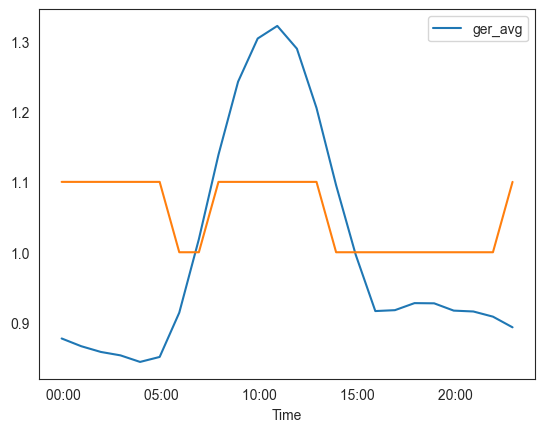

In [90]:
#'Jan', 'Apr', 'Jul', 'Oct',
list = ['ger_avg']
for string in list:
    print(globals()['tradevol_%s' % string].mean(axis = 0))
    anteil_mean = (globals()['tradevol_%s' % string]/globals()['tradevol_%s' % string].mean(axis=0))
    anteil_mean.plot(x="Time", y="Value", label = string)
    plt.legend(loc="upper left")
    

#plt.boxplot(anteil_mean)
#print(len(df_region_1_EC1))

for i in range (0,len(tradevol_ger_avg)):
        deviation_gn = 0.1
        deviation_yl = 1
        if abs(anteil_mean[i] - 1) < deviation_gn:
            anteil_mean[i] = 1
        elif abs(anteil_mean[i] - 1) < deviation_yl:
            anteil_mean[i] = 1 + deviation_gn
        else:
            anteil_mean[i] = 1 + deviation_yl
            
print(anteil_mean)
anteil_mean.plot(x="Time", y="Value")
#anteil_mean.plot(x="Time", y="Value")
plt.show


Time
 00:00    1.0
 01:00    1.0
 02:00    1.0
 03:00    1.0
 04:00    1.0
 05:00    1.0
 06:00    1.0
 07:00    1.0
 08:00    1.0
 09:00    1.2
 10:00    1.2
 11:00    1.2
 12:00    1.2
 13:00    1.2
 14:00    1.0
 15:00    1.0
 16:00    1.0
 17:00    1.0
 18:00    1.0
 19:00    1.0
 20:00    1.0
 21:00    1.0
 22:00    1.0
 23:00    1.0
Name: Value, dtype: float64


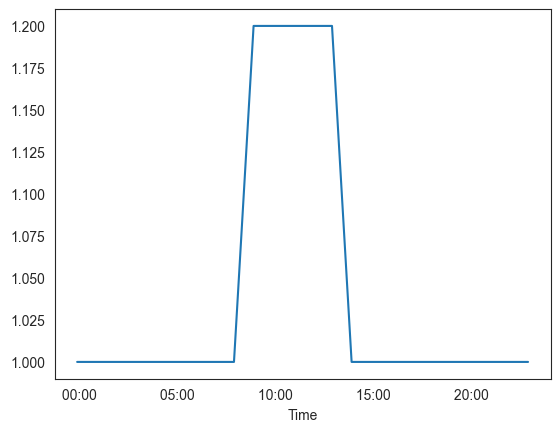

In [68]:
list = ['Jan', 'Apr', 'Jul', 'Oct', 'ger_avg']
for string in list:
    anteil_mean = (globals()['tradevol_%s' % string]/globals()['tradevol_%s' % string].mean(axis=0))
    for i in range (0,len(globals()['tradevol_%s' % string])):
        deviation_gn = 0.2
        deviation_yl = 1
        if abs(anteil_mean[i] - 1) < deviation_gn:
            anteil_mean[i] = 1
        elif abs(anteil_mean[i] - 1) < deviation_yl:
            anteil_mean[i] = 1 + deviation_gn
        else:
            anteil_mean[i] = 1 + deviation_yl
            
    if string == "ger_avg":
        print(anteil_mean)
        anteil_mean.plot(x="Time", y="Value")
        #anteil_mean.plot(x="Time", y="Value")
        plt.show

In [ ]:
#call function tradevol
month = "Januar"
tradevol = get_trade_volume(home_path, month)

#print(len(tradevol))
for i in range (1,len(tradevol)+1):
    #Split profile names into necessary columns
        tradevol[i-1][["Date","Time"]]=tradevol[i-1]["Meta"].str.split('.', expand=True)[4].str.split(',', expand=True)
        # entfernen von dem h aus der Zeit
        tradevol[i-1]["Time"] = tradevol[i-1]["Time"].str.split(' h', expand=True)[0]
        # hinzufügen von ECO und Art
        tradevol[i-1][["EC","Type"]] = tradevol[i-1]["Meta"].str.split('.', n=1, expand=True)[0].str.split('_', n=3, expand=True)[3].str.split('_', n=1, expand=True)
    #create dataframes for each EC
        globals()['df_region_%s_EC0' % i] = tradevol[i-1].query('EC=="EC0"')
#        globals()['df_region_%s_EC1' % i] = tradevol[i-1].query('EC=="EC1"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC1' % i] = tradevol[i-1].query('EC=="EC1"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC2' % i] = tradevol[i-1].query('EC=="EC2"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC3' % i] = tradevol[i-1].query('EC=="EC3"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC4' % i] = tradevol[i-1].query('EC=="EC4"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC5' % i] = tradevol[i-1].query('EC=="EC5"').groupby(['Time']).Value.mean()

EC1 = df_region_1_EC1
EC2 = df_region_1_EC2
EC3 = df_region_1_EC3
EC4 = df_region_1_EC4


#call function tradevol
month = "April"
tradevol = get_trade_volume(home_path, month)

#print(len(tradevol))
for i in range (1,len(tradevol)+1):
    #Split profile names into necessary columns
        tradevol[i-1][["Date","Time"]]=tradevol[i-1]["Meta"].str.split('.', expand=True)[4].str.split(',', expand=True)
        # entfernen von dem h aus der Zeit
        tradevol[i-1]["Time"] = tradevol[i-1]["Time"].str.split(' h', expand=True)[0]
        # hinzufügen von ECO und Art
        tradevol[i-1][["EC","Type"]] = tradevol[i-1]["Meta"].str.split('.', n=1, expand=True)[0].str.split('_', n=3, expand=True)[3].str.split('_', n=1, expand=True)
    #create dataframes for each EC
        globals()['df_region_%s_EC0' % i] = tradevol[i-1].query('EC=="EC0"')
#        globals()['df_region_%s_EC1' % i] = tradevol[i-1].query('EC=="EC1"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC1' % i] = tradevol[i-1].query('EC=="EC1"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC2' % i] = tradevol[i-1].query('EC=="EC2"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC3' % i] = tradevol[i-1].query('EC=="EC3"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC4' % i] = tradevol[i-1].query('EC=="EC4"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC5' % i] = tradevol[i-1].query('EC=="EC5"').groupby(['Time']).Value.mean()

    #Now all dataframes in the form "df_region_1_EC1" are available
EC1 = EC1.concat([EC1, df_region_1_EC1], axis=0)
EC2 = EC2.concat([EC2, df_region_1_EC2], axis=0)
EC3 = EC3.concat([EC3, df_region_1_EC3], axis=0)
EC4 = EC4.concat([EC4, df_region_1_EC4], axis=0)

#call function tradevol
month = "Juli"
tradevol = get_trade_volume(home_path, month)

#print(len(tradevol))
for i in range (1,len(tradevol)+1):
    #Split profile names into necessary columns
        tradevol[i-1][["Date","Time"]]=tradevol[i-1]["Meta"].str.split('.', expand=True)[4].str.split(',', expand=True)
        # entfernen von dem h aus der Zeit
        tradevol[i-1]["Time"] = tradevol[i-1]["Time"].str.split(' h', expand=True)[0]
        # hinzufügen von ECO und Art
        tradevol[i-1][["EC","Type"]] = tradevol[i-1]["Meta"].str.split('.', n=1, expand=True)[0].str.split('_', n=3, expand=True)[3].str.split('_', n=1, expand=True)
    #create dataframes for each EC
        globals()['df_region_%s_EC0' % i] = tradevol[i-1].query('EC=="EC0"')
#        globals()['df_region_%s_EC1' % i] = tradevol[i-1].query('EC=="EC1"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC1' % i] = tradevol[i-1].query('EC=="EC1"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC2' % i] = tradevol[i-1].query('EC=="EC2"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC3' % i] = tradevol[i-1].query('EC=="EC3"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC4' % i] = tradevol[i-1].query('EC=="EC4"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC5' % i] = tradevol[i-1].query('EC=="EC5"').groupby(['Time']).Value.mean()

    #Now all dataframes in the form "df_region_1_EC1" are available
EC1 = EC1.concat([EC1, df_region_1_EC1], axis=0)
EC2 = EC2.concat([EC2, df_region_1_EC2], axis=0)
EC3 = EC3.concat([EC3, df_region_1_EC3], axis=0)
EC4 = EC4.concat([EC4, df_region_1_EC4], axis=0)


In [ ]:

#call function tradevol
month = "October"
tradevol = get_trade_volume(home_path, month)



#print(len(tradevol))
for i in range (1,len(tradevol)+1):
    #Split profile names into necessary columns
        tradevol[i-1][["Date","Time"]]=tradevol[i-1]["Meta"].str.split('.', expand=True)[4].str.split(',', expand=True)
        # entfernen von dem h aus der Zeit
        tradevol[i-1]["Time"] = tradevol[i-1]["Time"].str.split(' h', expand=True)[0]
        # hinzufügen von ECO und Art
        tradevol[i-1][["EC","Type"]] = tradevol[i-1]["Meta"].str.split('.', n=1, expand=True)[0].str.split('_', n=3, expand=True)[3].str.split('_', n=1, expand=True)
    #create dataframes for each EC
        globals()['df_region_%s_EC0' % i] = tradevol[i-1].query('EC=="EC0"')
#        globals()['df_region_%s_EC1' % i] = tradevol[i-1].query('EC=="EC1"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC1' % i] = tradevol[i-1].query('EC=="EC1"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC2' % i] = tradevol[i-1].query('EC=="EC2"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC3' % i] = tradevol[i-1].query('EC=="EC3"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC4' % i] = tradevol[i-1].query('EC=="EC4"').groupby(['Time']).Value.mean()
        globals()['df_region_%s_EC5' % i] = tradevol[i-1].query('EC=="EC5"').groupby(['Time']).Value.mean()

    #Now all dataframes in the form "df_region_1_EC1" are available
EC1 = EC1.concat([EC1, df_region_1_EC1], axis=0)
EC2 = EC2.concat([EC2, df_region_1_EC2], axis=0)
EC3 = EC3.concat([EC3, df_region_1_EC3], axis=0)
EC4 = EC4.concat([EC4, df_region_1_EC4], axis=0)

#Fehler mit conat

In [ ]:

print(df_region_1_EC1.mean(axis = 0))
anteil_mean = (df_region_1_EC1 / (df_region_1_EC1.mean(axis = 0)))
anteil_mean.plot(x="Time", y="Value")

#plt.boxplot(anteil_mean)
#print(len(df_region_1_EC1))


for i in range (0,len(df_region_1_EC1)):
    deviation_gn = 0.3
    deviation_yl = 1
    
    if abs(anteil_mean[i] - 1) < deviation_gn:
        anteil_mean[i] = 1
    elif abs(anteil_mean[i] - 1) < deviation_yl:
        anteil_mean[i] = 1 + deviation_gn
    else:
        anteil_mean[i] = 1 + deviation_yl
        
print(anteil_mean)
anteil_mean.plot(x="Time", y="Value")
#anteil_mean.plot(x="Time", y="Value")
plt.show


In [86]:
def get_trade_volume(homepath, month):
    os.chdir(month + "/aggregated_results")
    #Open json file and read as dataframe in "highest resolution -> level 4"
    with open('trade_profile.json', 'r') as data:
      data = json.load(data)
    df = pd.json_normalize(data, max_level=4)
    
    #filter dataframe to trade profils including Member, accumulated to get profiles of the MMs
    df_MM = df.filter(regex='Member')
    df_MM = df_MM.filter(regex='accumulated')
    #delete profiles including "sold" -> To avoid double profiles
    df_MM = df_MM.drop(df_MM.filter(regex='bought').columns, axis =1)
    
    #Split df into dfs for each region and rename header
    df_region1 = df_MM.filter(regex='Region_1').T.reset_index().rename({"index":"Meta",0:"Value"}, axis=1)
    df_region2 = df_MM.filter(regex='Region_2').T.reset_index().rename({"index":"Meta",0:"Value"}, axis=1)
    df_region3 = df_MM.filter(regex='Region_3').T.reset_index().rename({"index":"Meta",0:"Value"}, axis=1)
    df_region4 = df_MM.filter(regex='Region_4').T.reset_index().rename({"index":"Meta",0:"Value"}, axis=1)
    df_region5 = df_MM.filter(regex='Region_5').T.reset_index().rename({"index":"Meta",0:"Value"}, axis=1)
    df_region6 = df_MM.filter(regex='Region_6').T.reset_index().rename({"index":"Meta",0:"Value"}, axis=1)
    
    os.chdir(homepath)
    return [df_region1, df_region2, df_region3, df_region4, df_region5, df_region6]

In [98]:
use_case = "use_case_2"

home_path = "C:\\Users\mkaiser\FIM Kernkompetenzzentrum\Projekt VIdES - General\\07_Arbeitsordner\\04_Ergebnisse\\20220920_Ergebnisse_4_Wochen\\" + use_case

os.chdir(home_path)
tradevol_month = get_trade_volume_uc2 (home_path, "april")

  eb81c0f5-d14c-4bf1-a29a-0ecade6e5e72.name  \
0                 Region_5_ID_5_Wind_FeedIn   

   eb81c0f5-d14c-4bf1-a29a-0ecade6e5e72.produced  \
0                                   -7755.388057   

   eb81c0f5-d14c-4bf1-a29a-0ecade6e5e72.earned  \
0                                 48313.776261   

  eb81c0f5-d14c-4bf1-a29a-0ecade6e5e72.parent_uuid  \
0             67fd6213-1c79-45f0-869e-cbc56940da0f   

  eb81c0f5-d14c-4bf1-a29a-0ecade6e5e72.children  \
0                                            []   

  67fd6213-1c79-45f0-869e-cbc56940da0f.name  \
0                   Region_5_EC0_house_Wind   

  67fd6213-1c79-45f0-869e-cbc56940da0f.type  \
0                                     house   

   67fd6213-1c79-45f0-869e-cbc56940da0f.produced  \
0                                   -7755.388057   

   67fd6213-1c79-45f0-869e-cbc56940da0f.earned  \
0                                 48313.776261   

   67fd6213-1c79-45f0-869e-cbc56940da0f.producedForExternal.Region_5_ID_5_Wind_FeedIn  \
0 

In [97]:
def get_trade_volume_uc2 (homepath, month):
    os.chdir(month+"/aggregated_results")

    with open('cumulative_grid_trades.json','r') as data:
        data = json.load(data)
    df = pd.json_normalize(data, max_level=2)
    print(df)